In [133]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [134]:
mutToFrequency = {} #key is bin, value is frequency of mutated CpG sites in this bin
totalCpGFrequency = {} #key is bin, value is total frequency of CpG sites in this bin

In [135]:
#takes a list of methylation ratios and "bins" them while keeping track of the frequency in each bin.
#ratios of exactly 0 and exactly 1 are separate bins, and the rest are in increments of 0.1 from 0 to 1 for a total of 12 bins
#for example, a bin of 0.25 represents all methylation ratios falling between 0.2 and 0.3
def bin(binToFrequency, ratios):
    for ratio in ratios:
        if ratio == 0: #0
            if 0 not in binToFrequency.keys():
                binToFrequency[0] = 0
            binToFrequency[0] += 1

        elif ratio > 0 and ratio <= 0.1: #0.05
            if 0.05 not in binToFrequency.keys():
                binToFrequency[0.05] = 0
            binToFrequency[0.05] += 1

        elif ratio > 0.1 and ratio <= 0.2: #0.15
            if 0.15 not in binToFrequency.keys():
                binToFrequency[0.15] = 0
            binToFrequency[0.15] += 1

        elif ratio > 0.2 and ratio <= 0.3: #0.25
            if 0.25 not in binToFrequency.keys():
                binToFrequency[0.25] = 0
            binToFrequency[0.25] += 1

        elif ratio > 0.3 and ratio <= 0.4: #0.35
            if 0.35 not in binToFrequency.keys():
                binToFrequency[0.35] = 0
            binToFrequency[0.35] += 1

        elif ratio > 0.4 and ratio <= 0.5: #0.45
            if 0.45 not in binToFrequency.keys():
                binToFrequency[0.45] = 0
            binToFrequency[0.45] += 1

        elif ratio > 0.5 and ratio <= 0.6: #0.55
            if 0.55 not in binToFrequency.keys():
                binToFrequency[0.55] = 0
            binToFrequency[0.55] += 1

        elif ratio > 0.6 and ratio <= 0.7: #0.65
            if 0.65 not in binToFrequency.keys():
                binToFrequency[0.65] = 0
            binToFrequency[0.65] += 1

        elif ratio > 0.7 and ratio <= 0.8: #0.75
            if 0.75 not in binToFrequency.keys():
                binToFrequency[0.75] = 0
            binToFrequency[0.75] += 1

        elif ratio > 0.8 and ratio <= 0.9: #0.85
            if 0.85 not in binToFrequency.keys():
                binToFrequency[0.85] = 0
            binToFrequency[0.85] += 1

        elif ratio > 0.9 and ratio < 1: #0.95
            if 0.95 not in binToFrequency.keys():
                binToFrequency[0.95] = 0
            binToFrequency[0.95] += 1

        else: #ratio == 1
            if 1 not in binToFrequency.keys():
                binToFrequency[1] = 0
            binToFrequency[1] += 1

In [136]:
#Input file 1: bed file containing all CpG's tested and their mean methylation ratio
#Input file 2: bed file containing all CpG sites where mutations occurred
df = pd.read_csv('MALY_cds_average_methylation_fixed.bed', sep='\t', header=None)
mut = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/MALY_cds_average_methylation_mutation.bed.noDuplicates', sep='\t', header=None)

means = df.iloc[:, 4]
means2 = mut.iloc[:, 4]

bin(totalCpGFrequency, means)
bin(mutToFrequency, means2)

In [137]:
print (mutToFrequency)

{0.85: 140787, 0.75: 45706, 0.65: 17990, 0.55: 10001, 0.95: 318897, 0: 1666, 1: 37640, 0.25: 1567, 0.45: 7068, 0.35: 3276, 0.15: 1160, 0.05: 1619}


In [138]:
print (totalCpGFrequency)

{0.75: 4363152, 0.65: 2274910, 0.85: 10110234, 0.95: 22532826, 0.55: 1462494, 0.35: 663720, 0.45: 1124304, 0.25: 449640, 1: 4051256, 0.15: 484930, 0: 2811264, 0.05: 1550384}


In [139]:
xs = np.array(list(mutToFrequency.keys()))
ys = np.array([mutToFrequency[x]/totalCpGFrequency[x]*1000000 / 7 for x in mutToFrequency.keys()]) #frequency of mutations per megabase

In [140]:
print (xs)
print (ys)
print (len(xs))
print (len(ys))

[ 0.85  0.75  0.65  0.55  0.95  0.    1.    0.25  0.45  0.35  0.15  0.05]
[ 1989.3138548   1496.49349173  1129.71502169   976.9026647   2021.79319566
    84.65942722  1327.27797432   497.85860434   898.07942133   705.11661544
   341.72826122   149.17963181]
12
12


In [141]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)
line = slope*xs + intercept
# plt.plot(xs, ys, 'o')
# plt.plot(xs, ys, 'o', line)

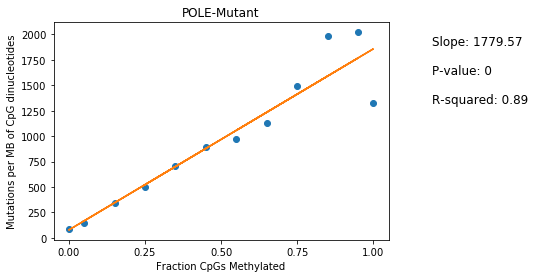

In [142]:
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.plot(xs, ys, 'o', xs, line, '-')
plt.ylabel('Mutations per MB of CpG dinucleotides')
plt.xlabel('Fraction CpGs Methylated')
plt.title('POLE-Mutant')
plt.gcf().text(1.0, 0.8, "Slope: %.2f" %slope, fontsize=12)
plt.gcf().text(1.0, 0.7, "P-value: %d" %p_value, fontsize=12)
plt.gcf().text(1.0, 0.6, "R-squared: %.2f" %r_value**2, fontsize=12)

In [143]:
# print ("Slope: %d" %slope)
# print ("P-value: " %p_value)
# print ("R-squared: " %r_value**2)

In [144]:
print (slope)
print (p_value)
print (r_value**2)

1779.56979622
4.58791914354e-06
0.887841615388
